In [81]:
import os
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")


In [112]:
train_path = '../train'
val_path = '../val'
test_path = '../test'

video_path = train_path

In [113]:
def get_video_info(video_path):

    fps = []
    duration = []
    failed = []

    record = {}

    for i, file in enumerate(os.listdir(video_path)):

        filepath = os.path.join(video_path, file)
        # print(filepath)

        cap = cv2.VideoCapture(filepath)

        if not cap.isOpened():
            print(f'Error: Unable to open {filepath}')
            failed.append(filepath)
            continue

        _fps = cap.get(cv2.CAP_PROP_FPS)
        _duration = cap.get(cv2.CAP_PROP_FRAME_COUNT) / _fps

        fps.append(_fps)
        duration.append(_duration)

        video_name, _ = os.path.splitext(file)

        record[video_name] = {}

        record[video_name]['fps'] = _fps
        record[video_name]['duration'] = _duration

    return fps, duration, record, failed

    
    

In [90]:
def find_video_names(record, target_duration):
    matching_video_names = []

    for video_name, info in record.items():
        if info['duration'] == target_duration:
            matching_video_names.append(video_name)

    return matching_video_names

In [114]:
fps_list = []
duration = []
failed = []
record = None

In [117]:
fps_list, duration, record, failed = get_video_info(video_path=video_path)
num_videos = len(os.listdir(video_path))

In [122]:
print(f'Number of videos: {num_videos}\n')

num_failed = len(failed)
print(f'Num of failed: {num_failed}')
print('Here are the failures:')
if num_failed > 0:
    for fail in failed:
        print(fail)

print('\n')
num_fps = len(fps_list)
print(f'Number of Videos with FPS: {num_fps}')
num_zero = fps_list.count(0.0)
print(f'Number of Video with 0.0 FPS: {num_zero}')

print('\n')
num_duration = len(duration)
print(f'Number of Videos with duration: {num_duration}')
num_duration_zero = fps_list.count(0.0)
print(f'Number of Video with 0.0 duration: {num_duration_zero}')

print('\n')
min_fps, max_fps = min(fps_list), max(fps_list)
min_dur, max_dur = min(duration), max(duration)
mean_fps = np.mean(fps_list)
mean_duration = np.mean(duration)
print(f'Min FPS = {min_fps}, Max FPS = {max_fps}, Average FPS = {np.mean(fps_list)}')
print(f'Min Duration = {min_dur}, Max Duration = {max_dur}, Average Duration = {np.mean(duration)}')

print('\n')
print(f'Number of videos less than Average FPS: {len([x for x in fps_list if x < mean_fps])}')
print(f'Number of videos greater than Average FPS: {len([x for x in fps_list if x > mean_fps])}')

print('\n')
print(f'Number of videos less than Average Duration: {len([x for x in duration if x < mean_duration])}')
print(f'Number of videos greater than Average Duration: {len([x for x in duration if x > mean_duration])}')

vid_time = 5
print(f'Number of videos greater than Average Duration: {len([x for x in duration if x > vid_time])}')


Number of videos: 620

Num of failed: 0
Here are the failures:


Number of Videos with FPS: 620
Number of Video with 0.0 FPS: 0


Number of Videos with duration: 620
Number of Video with 0.0 duration: 0


Min FPS = 15.0, Max FPS = 30.0, Average FPS = 27.176190203245103
Min Duration = 2.665, Max Duration = 3152.366666666667, Average Duration = 112.27795727377928


Number of videos less than Average FPS: 253
Number of videos greater than Average FPS: 367


Number of videos less than Average Duration: 464
Number of videos greater than Average Duration: 156
Number of videos greater than Average Duration: 616


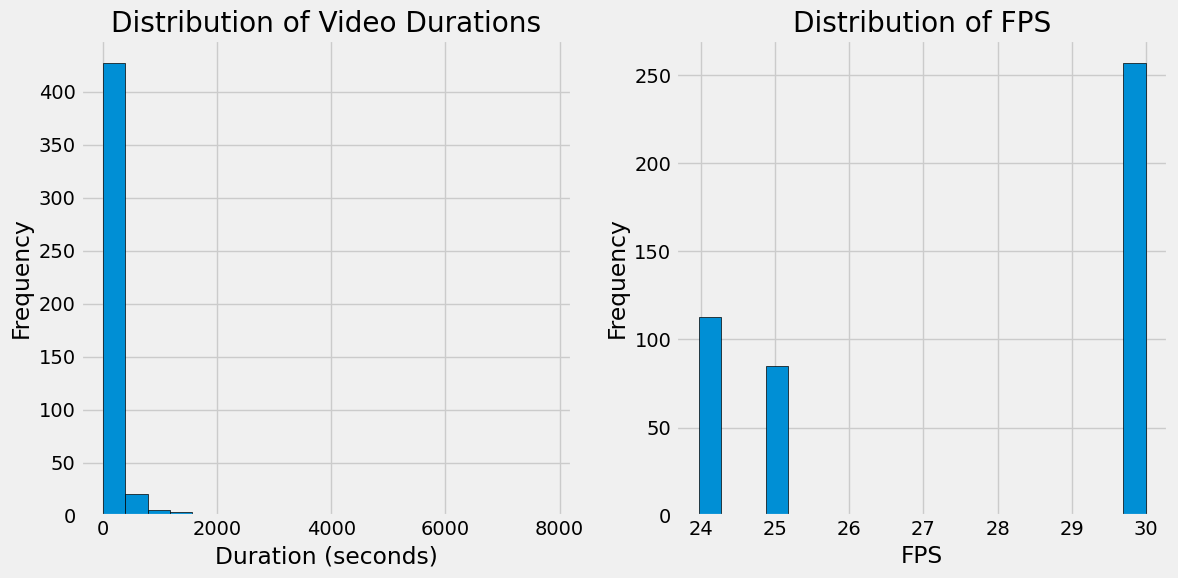

In [111]:
def analyze_video_info_distribution(record):
    # Extract durations and fps from the record dictionary
    durations = [info['duration'] for info in record.values()]
    fps_values = [info['fps'] for info in record.values()]

    # Create subplots for durations and fps
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot histogram for durations
    axes[0].hist(durations, bins=20, edgecolor='black')
    axes[0].set_title('Distribution of Video Durations')
    axes[0].set_xlabel('Duration (seconds)')
    axes[0].set_ylabel('Frequency')
    axes[0].grid(True)

    # Plot histogram for fps
    axes[1].hist(fps_values, bins=20, edgecolor='black')
    axes[1].set_title('Distribution of FPS')
    axes[1].set_xlabel('FPS')
    axes[1].set_ylabel('Frequency')
    axes[1].grid(True)

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

analyze_video_info_distribution(record)

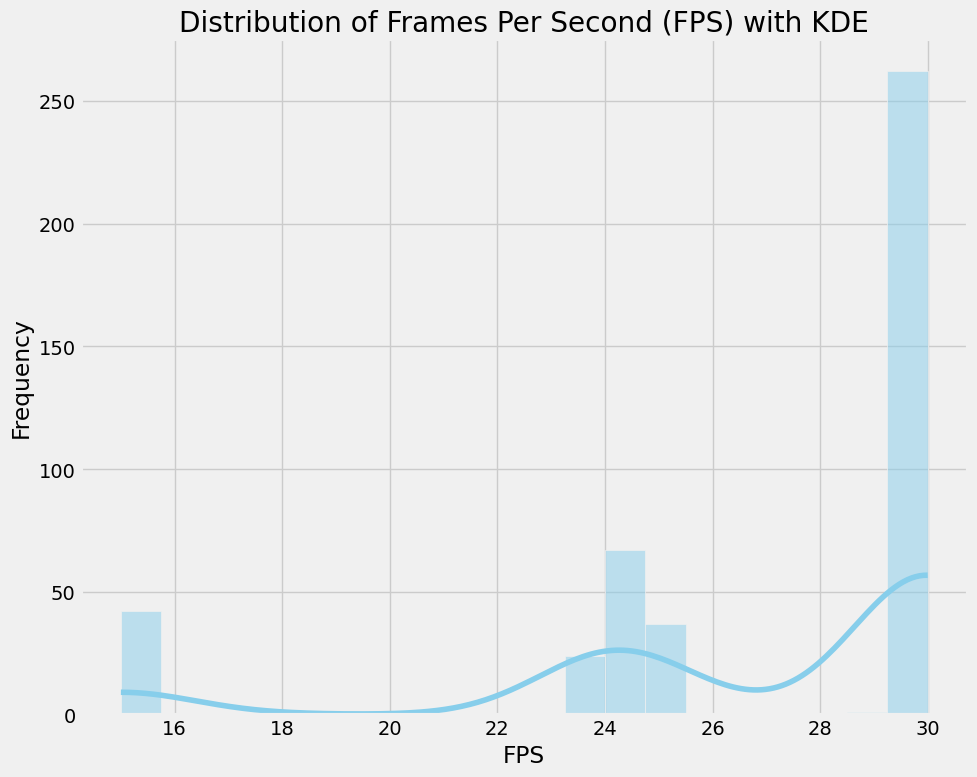

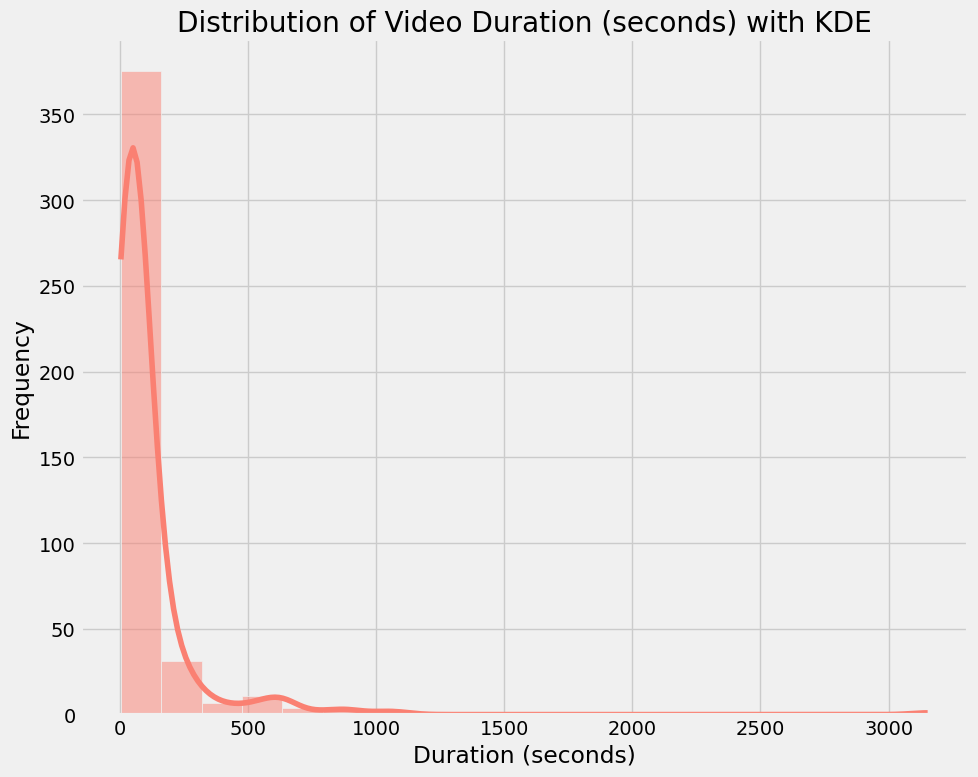

In [104]:
def plot_video_statistics_from_record_enhanced(record):
    # Extract FPS and duration from the record dictionary
    fps = [info['fps'] for info in record.values()]
    duration = [info['duration'] for info in record.values()]

    # Define the number of bins for the histograms based on the range of data using the square root rule
    bins_fps = int(np.sqrt(len(fps)))
    bins_duration = int(np.sqrt(len(duration)))

    # Plot for FPS distribution with KDE
    plt.figure(figsize=(10, 8))
    sns.histplot(fps, bins=bins_fps, kde=True, color='skyblue')
    plt.title('Distribution of Frames Per Second (FPS) with KDE')
    plt.xlabel('FPS')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot for Duration distribution with KDE
    plt.figure(figsize=(10, 8))
    sns.histplot(duration, bins=bins_duration, kde=True, color='salmon')
    plt.title('Distribution of Video Duration (seconds) with KDE')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_video_statistics_from_record_enhanced(record=record)

In [ ]:
def plot_video_statistics_with_curve(record):
    # Extract FPS and duration from the record dictionary
    fps_list = [info['fps'] for info in record.values()]
    duration_list = [info['duration'] for info in record.values()]
    video_ids = list(record.keys())  # Assuming video_ids are sorted in the desired order

    # Sort the fps and durations according to the video_ids
    fps_sorted = [record[video_id]['fps'] for video_id in video_ids]
    duration_sorted = [record[video_id]['duration'] for video_id in video_ids]

    # Plot FPS and duration as line plots to show variation over video_ids
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))

    axes[0].plot(video_ids, fps_sorted, marker='o', linestyle='-', color='skyblue')
    axes[0].set_title('FPS Variation Over Videos')
    axes[0].set_xlabel('Video IDs')
    axes[0].set_ylabel('FPS')
    axes[0].grid(True)

    axes[1].plot(video_ids, duration_sorted, marker='o', linestyle='-', color='salmon')
    axes[1].set_title('Duration Variation Over Videos')
    axes[1].set_xlabel('Video IDs')
    axes[1].set_ylabel('Duration (seconds)')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

# Example usage with the sample record (using the same record_example as defined previously)
plot_video_statistics_with_curve(record=record)

In [ ]:
def plot_video_statistics_with_fitted_curve(record):
    # Extract FPS and duration from the record dictionary
    fps = [info['fps'] for info in record.values()]
    duration = [info['duration'] for info in record.values()]
    
    # Create an array of video indexes
    video_indexes = np.arange(len(record))

    # Fit a curve using a polynomial for fps and duration
    fps_fit = np.poly1d(np.polyfit(video_indexes, fps, 3))
    duration_fit = np.poly1d(np.polyfit(video_indexes, duration, 3))

    # Generate values for the fitted curve
    x_fit = np.linspace(video_indexes.min(), video_indexes.max(), 100)
    y_fps_fit = fps_fit(x_fit)
    y_duration_fit = duration_fit(x_fit)

    # Plot FPS and duration with fitted curves
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))

    axes[0].plot(video_indexes, fps, 'o', color='skyblue', label='Original Data')
    axes[0].plot(x_fit, y_fps_fit, '-', color='darkblue', label='Fitted Curve')
    axes[0].set_title('FPS Fitted Curve')
    axes[0].set_xlabel('Video Index')
    axes[0].set_ylabel('FPS')
    axes[0].legend()
    axes[0].grid(True)

    axes[1].plot(video_indexes, duration, 'o', color='salmon', label='Original Data')
    axes[1].plot(x_fit, y_duration_fit, '-', color='darkred', label='Fitted Curve')
    axes[1].set_title('Duration Fitted Curve')
    axes[1].set_xlabel('Video Index')
    axes[1].set_ylabel('Duration (seconds)')
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

# Call the function with the example record
plot_video_statistics_with_fitted_curve(record=record)


In [ ]:
from scipy.stats import gaussian_kde



def plot_fitted_frequency_curves_from_record(record):
    # Extract FPS and duration from the record dictionary
    fps = [info['fps'] for info in record.values()]
    duration = [info['duration'] for info in record.values()]
    
    # Calculate the point density for FPS and Duration using gaussian_kde
    fps_density = gaussian_kde(fps)
    duration_density = gaussian_kde(duration)

    # Create a linspace for the x-axis to evaluate the density functions
    fps_x = np.linspace(min(fps), max(fps), 1000)
    duration_x = np.linspace(min(duration), max(duration), 1000)

    # Evaluate the density function at the linspace points
    fps_y = fps_density(fps_x)
    duration_y = duration_density(duration_x)

    # Plot the fitted frequency curves for FPS and Duration
    fig, axes = plt.subplots(2, 1, figsize=(10, 8))

    axes[0].plot(fps_x, fps_y, color='skyblue')
    axes[0].set_title('Fitted Frequency Curve for FPS')
    axes[0].set_xlabel('FPS')
    axes[0].set_ylabel('Density')
    axes[0].grid(True)

    axes[1].plot(duration_x, duration_y, color='salmon')
    axes[1].set_title('Fitted Frequency Curve for Duration')
    axes[1].set_xlabel('Duration (seconds)')
    axes[1].set_ylabel('Density')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

# Example usage with the sample record (using the same record_example as defined previously)
plot_fitted_frequency_curves_from_record(record)


In [28]:
video_name = find_video_names(record=record, target_duration=7831.29037370704)

In [29]:
video_name

['z0hNCHcJkmw']

In [33]:
df = pd.read_csv('../train.csv')

In [34]:
mask = df['video_id'] == 'z0hNCHcJkmw'
df[mask]

,video_id,text,label
434,z0hNCHcJkmw,adesso lavorare scuza barack obama anche te na...,0


In [96]:
train_df = pd.read_csv('../negative/training.csv')

In [98]:
mask = train_df['video_id'] == 'z0hNCHcJkmw'
train_df[mask]

,video_id,title,description,url,comments,label


In [97]:

mask = train_df['video_id'] == 'dKHDbEKsXNk'
train_df[mask]

,video_id,title,description,url,comments,label
